In [169]:
import pandas as pd

# Load your dataset
df = pd.read_csv('tweets_data.csv')  # Replace 'your_dataset.csv' with the actual file path

# Display the first few rows of the dataset
print(df.head())


       username                                            content    date  \
0  AlexYsalex17  When I talk to Israeli people about current si...   Nov 2   
1  AlexYsalex17  and with the help of Weibo, they eventually re...  Oct 19   
2  AlexYsalex17  In China, Israeli Embassy has paid a lot of ef...  Oct 19   
3  AlexYsalex17  Our reporter \n@AlexYsalex17\n takes a shot of...  Sep 13   
4  AlexYsalex17  Thank you very much for answering the question...  Sep 14   

  likes retweets replies  
0    16        0       5  
1    17        4       2  
2    18        5       2  
3    18        3       2  
4    33        1       9  


In [131]:
import langid

# Function to detect language
def detect_language(text):
    try:
        lang, _ = langid.classify(text)
        return lang
    except Exception as e:
        return None

# Apply language detection to each tweet
df['language'] = df['content'].apply(detect_language)

# Display the language column
print(df[['content', 'language']])


                                                 content language
0      When I talk to Israeli people about current si...       en
1      and with the help of Weibo, they eventually re...       en
2      In China, Israeli Embassy has paid a lot of ef...       en
3      Our reporter \n@AlexYsalex17\n takes a shot of...       en
4      Thank you very much for answering the question...       en
...                                                  ...      ...
11582  Falling on the 7th day of the 7th lunar month,...       en
11583  Today marks the #WorldElephantDay, a time to g...       en
11584  Swimming in Kunming Lake at the Summer Palace ...       en
11585  The aerial view of Hejingwan New Village in Zu...       en
11586  The “Meilimount” VS. the “#Paramount”.\n\nIn 1...       en

[11587 rows x 2 columns]


In [162]:
# Filter out non-English tweets (adjust as needed)
df_en = df[df['language'] == 'en']


In [132]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))  # Adjust for your language
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

# Apply text preprocessing to each tweet
df_en['processed_content'] = df_en['content'].apply(preprocess_text)

# Display the processed content
print(df_en[['content', 'processed_content']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18253\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18253\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                 content  \
0      When I talk to Israeli people about current si...   
1      and with the help of Weibo, they eventually re...   
2      In China, Israeli Embassy has paid a lot of ef...   
3      Our reporter \n@AlexYsalex17\n takes a shot of...   
4      Thank you very much for answering the question...   
...                                                  ...   
11582  Falling on the 7th day of the 7th lunar month,...   
11583  Today marks the #WorldElephantDay, a time to g...   
11584  Swimming in Kunming Lake at the Summer Palace ...   
11585  The aerial view of Hejingwan New Village in Zu...   
11586  The “Meilimount” VS. the “#Paramount”.\n\nIn 1...   

                                       processed_content  
0      [talk, israeli, people, current, situation, ga...  
1      [help, weibo, eventually, retrieve, password, ...  
2      [china, israeli, embassy, paid, lot, efforts, ...  
3      [reporter, takes, shot, nicolasmadur

C:\Users\18253\AppData\Local\Temp\ipykernel_10904\2149256752.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['processed_content'] = df_en['content'].apply(preprocess_text)


In [133]:
# Example: Sentiment Analysis using TextBlob
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each tweet
df_en['sentiment'] = df_en['content'].apply(get_sentiment)

# Display the sentiment column
print(df_en[['content', 'sentiment']])


                                                 content  sentiment
0      When I talk to Israeli people about current si...   0.180000
1      and with the help of Weibo, they eventually re...   0.250000
2      In China, Israeli Embassy has paid a lot of ef...   0.022222
3      Our reporter \n@AlexYsalex17\n takes a shot of...   0.000000
4      Thank you very much for answering the question...   0.320000
...                                                  ...        ...
11582  Falling on the 7th day of the 7th lunar month,...  -0.050000
11583  Today marks the #WorldElephantDay, a time to g...   0.750000
11584  Swimming in Kunming Lake at the Summer Palace ...   0.000000
11585  The aerial view of Hejingwan New Village in Zu...   0.045455
11586  The “Meilimount” VS. the “#Paramount”.\n\nIn 1...   0.450000

[7870 rows x 2 columns]


C:\Users\18253\AppData\Local\Temp\ipykernel_10904\2324938785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['sentiment'] = df_en['content'].apply(get_sentiment)


In [150]:
df_en

,username,content,date,likes,retweets,replies,language,processed_content,sentiment,sentiment_category
0,AlexYsalex17,When I talk to Israeli people about current si...,Nov 2,16,0,5,en,"[talk, israeli, people, current, situation, ga...",0.180000,Neutral
1,AlexYsalex17,"and with the help of Weibo, they eventually re...",Oct 19,17,4,2,en,"[help, weibo, eventually, retrieve, password, ...",0.250000,Positive
2,AlexYsalex17,"In China, Israeli Embassy has paid a lot of ef...",Oct 19,18,5,2,en,"[china, israeli, embassy, paid, lot, efforts, ...",0.022222,Neutral
3,AlexYsalex17,Our reporter \n@AlexYsalex17\n takes a shot of...,Sep 13,18,3,2,en,"[reporter, takes, shot, nicolasmaduro, venezue...",0.000000,Neutral
4,AlexYsalex17,Thank you very much for answering the question...,Sep 14,33,1,9,en,"[thank, much, answering, question, global, tim...",0.320000,Positive
...,...,...,...,...,...,...,...,...,...,...
11582,_cultureexpress,"Falling on the 7th day of the 7th lunar month,...","Aug 12, 2021",1,1,0,en,"[falling, day, lunar, month, qixi, festival, w...",-0.050000,Neutral
11583,_cultureexpress,"Today marks the #WorldElephantDay, a time to g...","Aug 11, 2021",0,0,0,en,"[today, marks, worldelephantday, time, give, l...",0.750000,Positive
11584,_cultureexpress,Swimming in Kunming Lake at the Summer Palace ...,"Aug 11, 2021",3,0,0,en,"[swimming, kunming, lake, summer, palace, beij...",0.000000,Neutral
11585,_cultureexpress,The aerial view of Hejingwan New Village in Zu...,"Aug 10, 2021",0,0,0,en,"[aerial, view, hejingwan, new, village, zunyi,...",0.045455,Neutral


In [164]:
df_en.head()

,username,content,likes,retweets,replies,language,topic
date,,,,,,,
NaT,AlexYsalex17,When I talk to Israeli people about current si...,16,0,5,en,0
NaT,AlexYsalex17,"and with the help of Weibo, they eventually re...",17,4,2,en,0
NaT,AlexYsalex17,"In China, Israeli Embassy has paid a lot of ef...",18,5,2,en,0
NaT,AlexYsalex17,Our reporter \n@AlexYsalex17\n takes a shot of...,18,3,2,en,0
NaT,AlexYsalex17,Thank you very much for answering the question...,33,1,9,en,0


In [170]:
# df = df_en
# Add ",2023" to values without a comma
df['date'] = df['date'].apply(lambda x: x + ', 2023' if ',' not in str(x) else x)

# Display the updated DataFrame
print(df)

              username                                            content  \
0         AlexYsalex17  When I talk to Israeli people about current si...   
1         AlexYsalex17  and with the help of Weibo, they eventually re...   
2         AlexYsalex17  In China, Israeli Embassy has paid a lot of ef...   
3         AlexYsalex17  Our reporter \n@AlexYsalex17\n takes a shot of...   
4         AlexYsalex17  Thank you very much for answering the question...   
...                ...                                                ...   
11582  _cultureexpress  Falling on the 7th day of the 7th lunar month,...   
11583  _cultureexpress  Today marks the #WorldElephantDay, a time to g...   
11584  _cultureexpress  Swimming in Kunming Lake at the Summer Palace ...   
11585  _cultureexpress  The aerial view of Hejingwan New Village in Zu...   
11586  _cultureexpress  The “Meilimount” VS. the “#Paramount”.\n\nIn 1...   

               date likes retweets replies  
0       Nov 2, 2023    16     

In [171]:
import pandas as pd
from datetime import datetime, timedelta

# Sample DataFrame
# data = {'date': ['Aug 10', 'Aug 10', 'Mar 29, 2022', '19h', '23h', '23h', 'Nov 16']}
# df3 = df_en# pd.DataFrame(data)

# Step 1: Convert strings to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
print(df['date'])
# Step 2: Replace missing years with '2023' and update times to today's date
today = datetime.now().strftime('%Y-%m-%d')

mask_missing_year = df['date'].isnull() | (df['date'].dt.year == 1900)
df['date'] = df['date'].apply(lambda x: x.replace(year=2023) if pd.isnull(x) or x.year == 1900 else x)

mask_with_hms = df['date'].astype(str).str.contains('h|m|s')
df.loc[mask_with_hms, 'date'] = today

# Display the updated DataFrame
print(df)


0       2023-11-02
1       2023-10-19
2       2023-10-19
3       2023-09-13
4       2023-09-14
           ...    
11582   2021-08-12
11583   2021-08-11
11584   2021-08-11
11585   2021-08-10
11586   2021-08-10
Name: date, Length: 11587, dtype: datetime64[ns]
              username                                            content  \
0         AlexYsalex17  When I talk to Israeli people about current si...   
1         AlexYsalex17  and with the help of Weibo, they eventually re...   
2         AlexYsalex17  In China, Israeli Embassy has paid a lot of ef...   
3         AlexYsalex17  Our reporter \n@AlexYsalex17\n takes a shot of...   
4         AlexYsalex17  Thank you very much for answering the question...   
...                ...                                                ...   
11582  _cultureexpress  Falling on the 7th day of the 7th lunar month,...   
11583  _cultureexpress  Today marks the #WorldElephantDay, a time to g...   
11584  _cultureexpress  Swimming in Kunming Lake 

In [174]:
df['date'].iloc[20:]

20      2023-10-19
21      2023-10-19
22      2023-09-13
23      2023-09-14
24      2023-08-24
           ...    
11582   2021-08-12
11583   2021-08-11
11584   2021-08-11
11585   2021-08-10
11586   2021-08-10
Name: date, Length: 11567, dtype: datetime64[ns]

In [175]:
df

,username,content,date,likes,retweets,replies
0,AlexYsalex17,When I talk to Israeli people about current si...,2023-11-02,16,0,5
1,AlexYsalex17,"and with the help of Weibo, they eventually re...",2023-10-19,17,4,2
2,AlexYsalex17,"In China, Israeli Embassy has paid a lot of ef...",2023-10-19,18,5,2
3,AlexYsalex17,Our reporter \n@AlexYsalex17\n takes a shot of...,2023-09-13,18,3,2
4,AlexYsalex17,Thank you very much for answering the question...,2023-09-14,33,1,9
...,...,...,...,...,...,...
11582,_cultureexpress,"Falling on the 7th day of the 7th lunar month,...",2021-08-12,1,1,0
11583,_cultureexpress,"Today marks the #WorldElephantDay, a time to g...",2021-08-11,0,0,0
11584,_cultureexpress,Swimming in Kunming Lake at the Summer Palace ...,2021-08-11,3,0,0
11585,_cultureexpress,The aerial view of Hejingwan New Village in Zu...,2021-08-10,0,0,0


In [151]:
df.to_excel("df_date_corrected.xlsx")

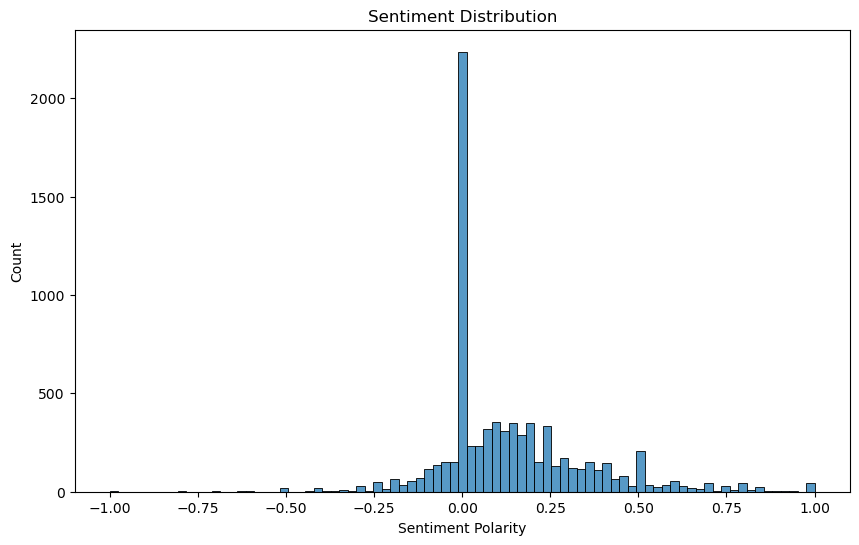

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your processed DataFrame (df_en with sentiment column)
# Adjust the file path accordingly
# df_en = pd.read_csv('path/to/your/processed_data.csv')

# Create a bar chart for sentiment visualization
plt.figure(figsize=(10, 6))
sns.histplot(x='sentiment', data=df_en, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


C:\Users\18253\AppData\Local\Temp\ipykernel_10904\1296757994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['sentiment_category'] = pd.cut(df_en['sentiment'], bins=[-1, -0.2, 0.2, 1], labels=['Negative', 'Neutral', 'Positive'])


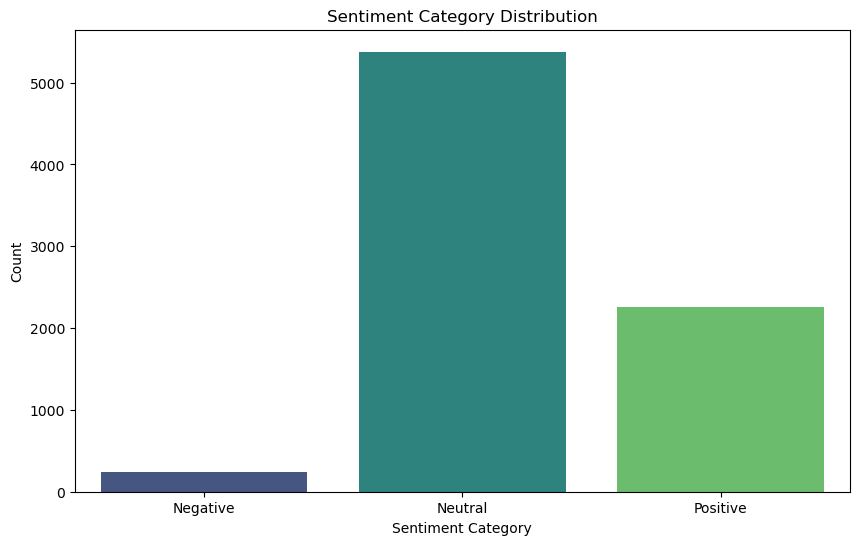

In [16]:
# Categorize sentiment into positive, neutral, and negative
df_en['sentiment_category'] = pd.cut(df_en['sentiment'], bins=[-1, -0.2, 0.2, 1], labels=['Negative', 'Neutral', 'Positive'])

# Create a bar chart for sentiment category visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=df_en, palette='viridis')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


KeyboardInterrupt: 

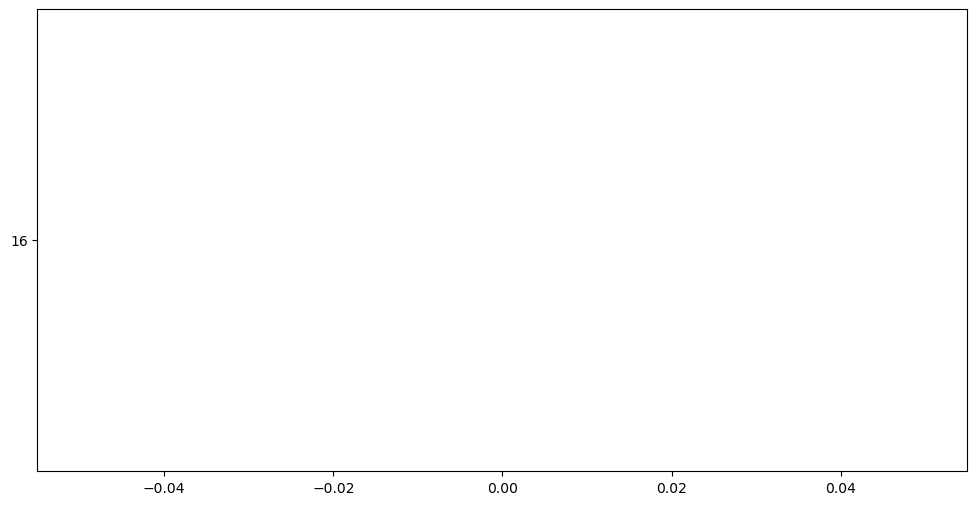

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['likes'], label='Likes')
sns.lineplot(x=df.index, y=df['retweets'], label='Retweets')
sns.lineplot(x=df.index, y=df['replies'], label='Replies')

plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


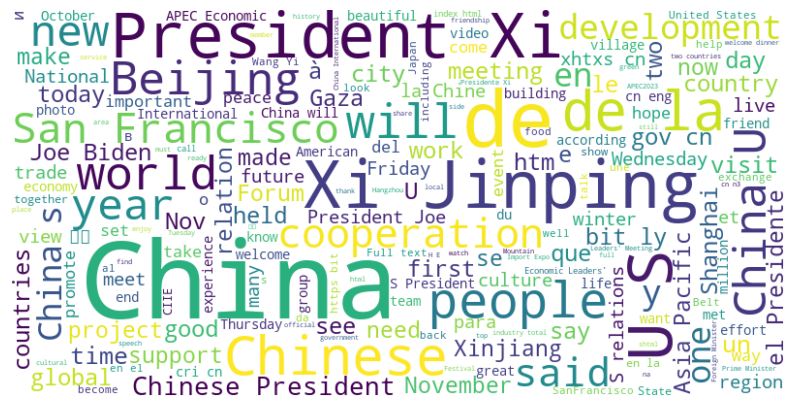

In [137]:
from wordcloud import WordCloud

# Convert the 'content' column to strings and handle NaN values
df['content'] = df['content'].astype(str)

# Combine all tweets into a single string
all_text = ' '.join(df['content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# Plotting the Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming 'likes', 'retweets', 'replies' are engagement features

# Standardize the engagement features
scaler = StandardScaler()
engagement_features = df[['likes', 'retweets', 'replies']]
engagement_features_standardized = scaler.fit_transform(engagement_features)

# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = isolation_forest.fit_predict(engagement_features_standardized)

# Visualize anomalies
sns.scatterplot(x='likes', y='retweets', hue='anomaly_score', data=df)
plt.title('Anomaly Detection: Engagement Features')
plt.show()


ValueError: could not convert string to float: '5.2K'

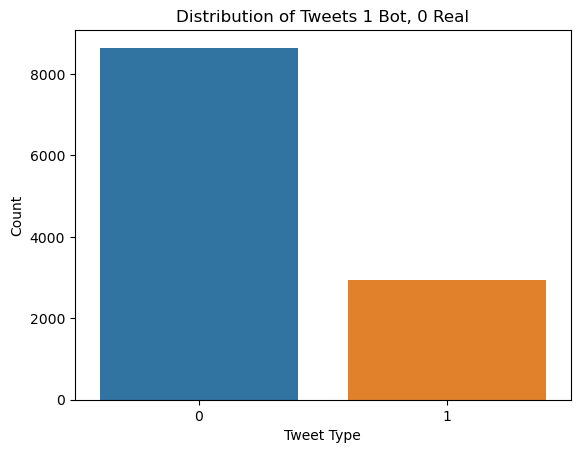

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'content' is the tweet text column

# Vectorize the text data
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['content'])

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Assign each tweet to a topic
topic_assignments = lda.transform(X).argmax(axis=1)

# Add the topic assignments to the DataFrame
df['topic'] = topic_assignments

# Visualize the topics
sns.countplot(x='topic', data=df)
plt.title('Distribution of Tweets 1 Bot, 0 Real')
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.show()


In [38]:
df

,username,content,likes,retweets,replies,language,topic
date,,,,,,,
NaT,AlexYsalex17,When I talk to Israeli people about current si...,16,0,5,en,0
NaT,AlexYsalex17,"and with the help of Weibo, they eventually re...",17,4,2,en,0
NaT,AlexYsalex17,"In China, Israeli Embassy has paid a lot of ef...",18,5,2,en,0
NaT,AlexYsalex17,Our reporter \n@AlexYsalex17\n takes a shot of...,18,3,2,en,0
NaT,AlexYsalex17,Thank you very much for answering the question...,33,1,9,en,0
...,...,...,...,...,...,...,...
NaT,_cultureexpress,"Falling on the 7th day of the 7th lunar month,...",1,1,0,en,0
NaT,_cultureexpress,"Today marks the #WorldElephantDay, a time to g...",0,0,0,en,0
NaT,_cultureexpress,Swimming in Kunming Lake at the Summer Palace ...,3,0,0,en,0


In [42]:
df[df['topic']== 1]
# Filter out non-English tweets (adjust as needed)
# df_en = df[df['language'] == 'en']


,username,content,likes,retweets,replies,language,topic
date,,,,,,,
NaT,AlexYsalex17,Is this a prediction about #BRICS?,11,0,1,en,1
NaT,AlexYsalex17,Is this a prediction about #BRICS?,11,0,1,en,1
NaT,ACSF1919,当地时间11月16日上午，国家主席习近平向在 #旧金山 举行的 #亚太经合 组织工商领导人峰...,1,0,0,zh,1
NaT,ACSF1919,#中国 温暖！近日，执行我国第40次 #南极 考察任务的“雪龙2”号刚穿越赤道，就发现一艘载...,6,2,1,zh,1
NaT,AmbassadeChine,"Le 14 novembre 2023, le deuxième Forum Chine-F...",31,13,4,fr,1
...,...,...,...,...,...,...,...
NaT,ZShilei,Chinese Vice Premier meets with business leade...,0,0,0,en,1
NaT,_bubblyabby_,Inside the reception and welcome dinner in San...,15,2,0,en,1
NaT,_bubblyabby_,Chinese national anthem played to greet #XiJin...,8,2,0,en,1


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# 0 is real 1 is bot
# Assuming 'content' is the tweet text and 'topic' is the labeled topic in your DataFrame 'df'

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['topic'], test_size=0.2, random_state=42)

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Train a Text Classification Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9646246764452114
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1712
           1       1.00      0.87      0.93       606

    accuracy                           0.96      2318
   macro avg       0.98      0.93      0.95      2318
weighted avg       0.97      0.96      0.96      2318



In [52]:
import joblib

# Assuming 'model' is the trained classification model
# Assuming 'vectorizer' is the TF-IDF vectorizer used for text representation

# Save the model and vectorizer to files
joblib.dump(model, 'text_classification_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [2]:
# Load the model and vectorizer from files
loaded_model = joblib.load('text_classification_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Example usage:
new_text = ["Is this a prediction about #BRICS?	", "The two presidents acknowledged the efforts of their respective teams",
            "I'm so happy to share that I trained this model after much efforts", "China is a great country","china beach san francisco"]
new_text_tfidf = loaded_vectorizer.transform(new_text)
predictions = loaded_model.predict(new_text_tfidf)

print("Predictions for new text:")
print(predictions)


Predictions for new text:
[0 1 0 0 1]


In [146]:
from sklearn.svm import SVC

# Step 3: Train a Text Classification Model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train_tfidf, y_train)

# Step 4: Evaluate the SVM Model
y_svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, y_svm_pred))


SVM Accuracy: 0.9672131147540983
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1712
           1       0.96      0.92      0.94       606

    accuracy                           0.97      2318
   macro avg       0.96      0.95      0.96      2318
weighted avg       0.97      0.97      0.97      2318



In [147]:

joblib.dump(model, 'text_classification_model2.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer2.joblib')

['tfidf_vectorizer2.joblib']

In [1]:
import joblib
# Load the model and vectorizer from files
loaded_model = joblib.load('text_classification_model2.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer2.joblib')

# Example usage:
new_text = ["Is this a prediction about #BRICS?	", "The two presidents acknowledged the efforts of their respective teams",
            "I'm so happy to share that I trained this awsome model after so much efforts", "China is a great country","china beach san francisco"]
new_text_tfidf = loaded_vectorizer.transform(new_text)
predictions = loaded_model.predict(new_text_tfidf)

print("Predictions for new text:")
print(predictions)


Predictions for new text:
[1 0 1 0 0]


In [62]:
df.to_csv("canis_data_with_topics.csv")

In [71]:
import re

def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

# Assuming 'df' is your DataFrame with a 'content' column containing tweet text
df['hashtags'] = df['content'].apply(extract_hashtags)


In [72]:
df

,username,content,likes,retweets,replies,language,topic,hashtags
date,,,,,,,,
NaT,AlexYsalex17,When I talk to Israeli people about current si...,16,0,5,en,0,"[Gaza, Hamas]"
NaT,AlexYsalex17,"and with the help of Weibo, they eventually re...",17,4,2,en,0,"[IsraelAttack, Palestine]"
NaT,AlexYsalex17,"In China, Israeli Embassy has paid a lot of ef...",18,5,2,en,0,[]
NaT,AlexYsalex17,Our reporter \n@AlexYsalex17\n takes a shot of...,18,3,2,en,0,"[Venezuela, Huawei]"
NaT,AlexYsalex17,Thank you very much for answering the question...,33,1,9,en,0,[]
...,...,...,...,...,...,...,...,...
NaT,_cultureexpress,"Falling on the 7th day of the 7th lunar month,...",1,1,0,en,0,"[Qixi, China, ValentinesDay, street, Hanghzou,..."
NaT,_cultureexpress,"Today marks the #WorldElephantDay, a time to g...",0,0,0,en,0,"[WorldElephantDay, mammals, Earth, protection,..."
NaT,_cultureexpress,Swimming in Kunming Lake at the Summer Palace ...,3,0,0,en,0,[]


In [73]:
from collections import Counter

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for hashtags in df['hashtags'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

# Convert to DataFrame for easier visualization
df_hashtag_counts = pd.DataFrame(list(hashtag_counts.items()), columns=['Hashtag', 'Count'])
df_hashtag_counts = df_hashtag_counts.sort_values(by='Count', ascending=False)


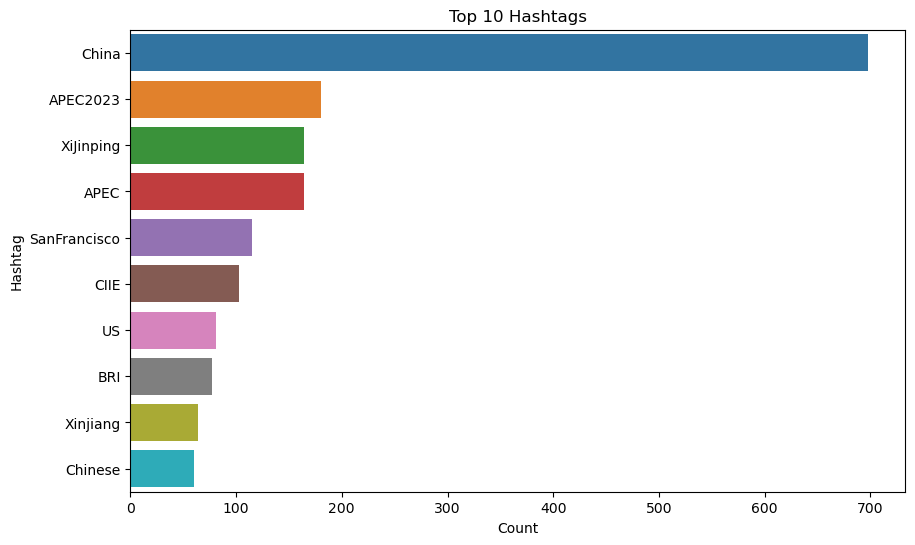

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to visualize the top 10 hashtags
top_n = 10

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Hashtag', data=df_hashtag_counts.head(top_n))
plt.title(f'Top {top_n} Hashtags')
plt.show()


In [78]:
df.columns

Index(['username', 'content', 'likes', 'retweets', 'replies', 'language',
       'topic', 'hashtags'],
      dtype='object')

c:\Users\18253\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 4102 (\N{MYANMAR LETTER CHA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\18253\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 4100 (\N{MYANMAR LETTER NGA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\18253\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\18253\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\18253\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\18253\anaconda3\lib\site

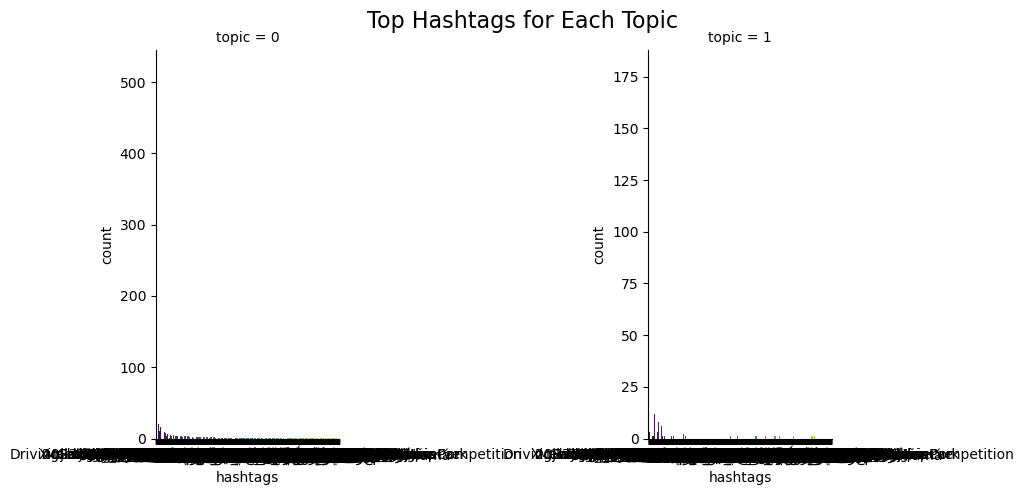

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'topic' and 'hashtags' columns

# Step 1: Extract Hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

df['hashtags'] = df['content'].apply(extract_hashtags)

# Step 2: Count Hashtag Occurrences
df['count'] = df['hashtags'].apply(len)

# Step 3: Explode the DataFrame to separate rows for each hashtag
df_exploded = df.explode('hashtags')

# Step 4: Create a FacetGrid
g = sns.FacetGrid(df_exploded, col='topic', col_wrap=2, height=5, sharey=False)

# Step 5: Plot Bar Plots
g.map(sns.countplot, 'hashtags', palette='viridis', order=df_exploded['hashtags'].value_counts().index)

# Step 6: Adjust Layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top Hashtags for Each Group (Real & Bot-generated)', fontsize=16)

plt.show()


In [82]:
!pip install wordcloud

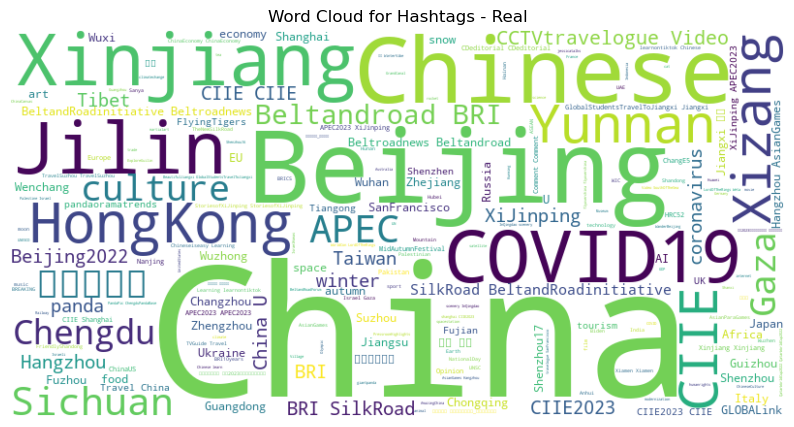

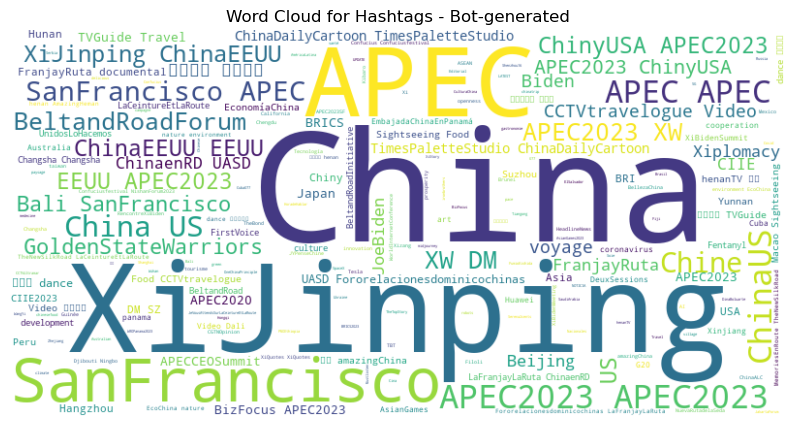

In [86]:
from wordcloud import WordCloud

# Assuming df is your DataFrame with 'topic' and 'content' columns

# Step 1: Extract Hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

df['hashtags'] = df['content'].apply(extract_hashtags)

# Step 2: Combine hashtags for each topic into a single list
df_grouped = df.groupby('topic')['hashtags'].apply(lambda x: [item for sublist in x for item in sublist]).reset_index()

# Step 3: Generate and display a word cloud for each topic
for index, row in df_grouped.iterrows():
    topic = row['topic']
    hashtags_text = ' '.join(row['hashtags'])  # Combine the list of hashtags into a single string

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)
    group_name = ['Real', "Bot-generated"]
    # Display word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Hashtags - {group_name[topic]}')
    plt.show()


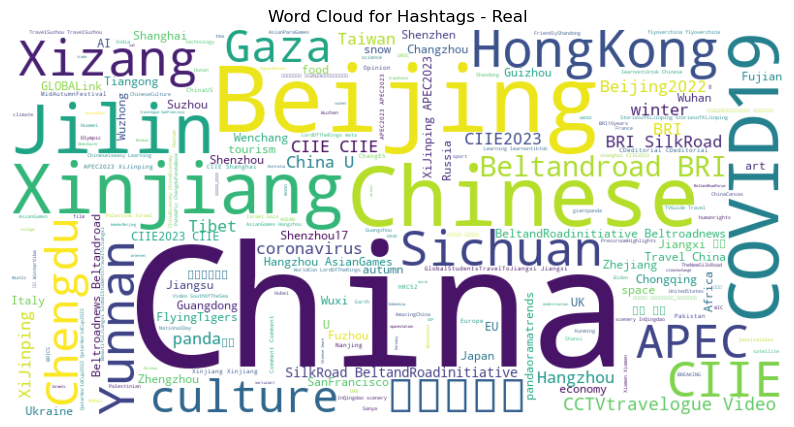

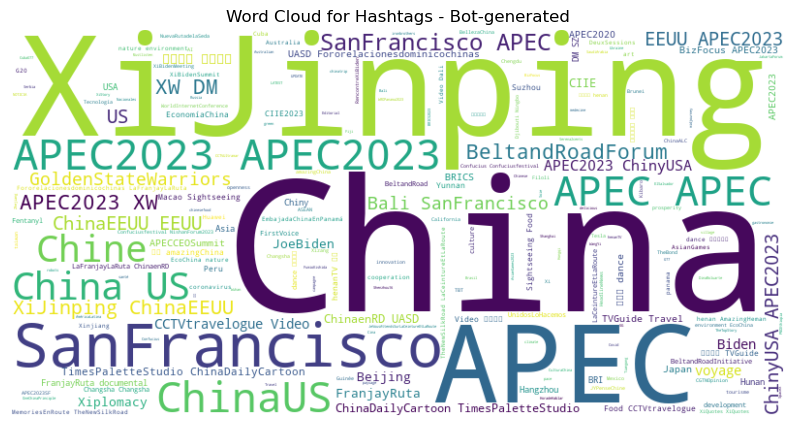

In [88]:
from wordcloud import WordCloud
import re

# Assuming df is your DataFrame with 'topic' and 'content' columns

# Step 1: Extract Hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

df['hashtags'] = df['content'].apply(extract_hashtags)

# Step 2: Combine hashtags for each topic into a single list
df_grouped = df.groupby('topic')['hashtags'].apply(lambda x: [re.sub(r'\W', '', item) for sublist in x for item in sublist]).reset_index()

# Step 3: Generate and display a word cloud for each topic
for index, row in df_grouped.iterrows():
    topic = row['topic']
    hashtags_text = ' '.join(row['hashtags'])  # Combine the list of hashtags into a single string

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)
    group_name = ['Real', "Bot-generated"]
    # Display word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Hashtags - {group_name[topic]}')
    plt.show()


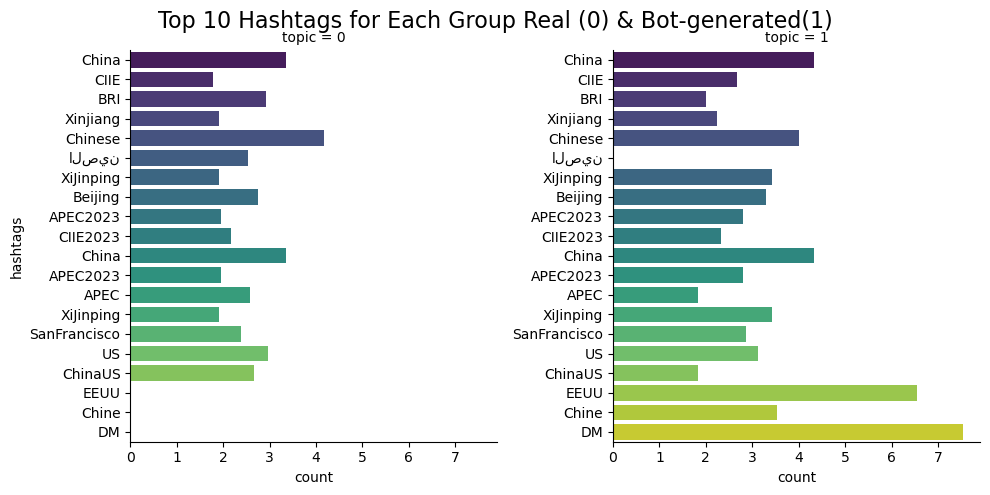

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'topic' and 'hashtags' columns

# Step 1: Extract Hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

df['hashtags'] = df['content'].apply(extract_hashtags)

# Step 2: Count Hashtag Occurrences
df['count'] = df['hashtags'].apply(len)

# Step 3: Explode the DataFrame to separate rows for each hashtag
df_exploded = df.explode('hashtags')

# Step 4: Get the top 10 hashtags for each topic
top_hashtags_by_topic = df_exploded.groupby(['topic', 'hashtags']).size().reset_index(name='count')
top_hashtags_by_topic = top_hashtags_by_topic.sort_values(['topic', 'count'], ascending=[True, False])
top_hashtags_by_topic = top_hashtags_by_topic.groupby('topic').head(10)

# Step 5: Create a FacetGrid
g = sns.FacetGrid(df_exploded, col='topic', col_wrap=2, height=5, sharey=False)

# Step 6: Plot Bar Plots for the top 10 hashtags
g.map(sns.barplot, 'count', 'hashtags', palette='viridis', ci=None, order=top_hashtags_by_topic['hashtags'])

# Step 7: Adjust Layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top 10 Hashtags for Each Group Real (0) & Bot-generated(1)', fontsize=16)

plt.show()


In [97]:
df.to_excel('Data with Hashtag.xlsx')

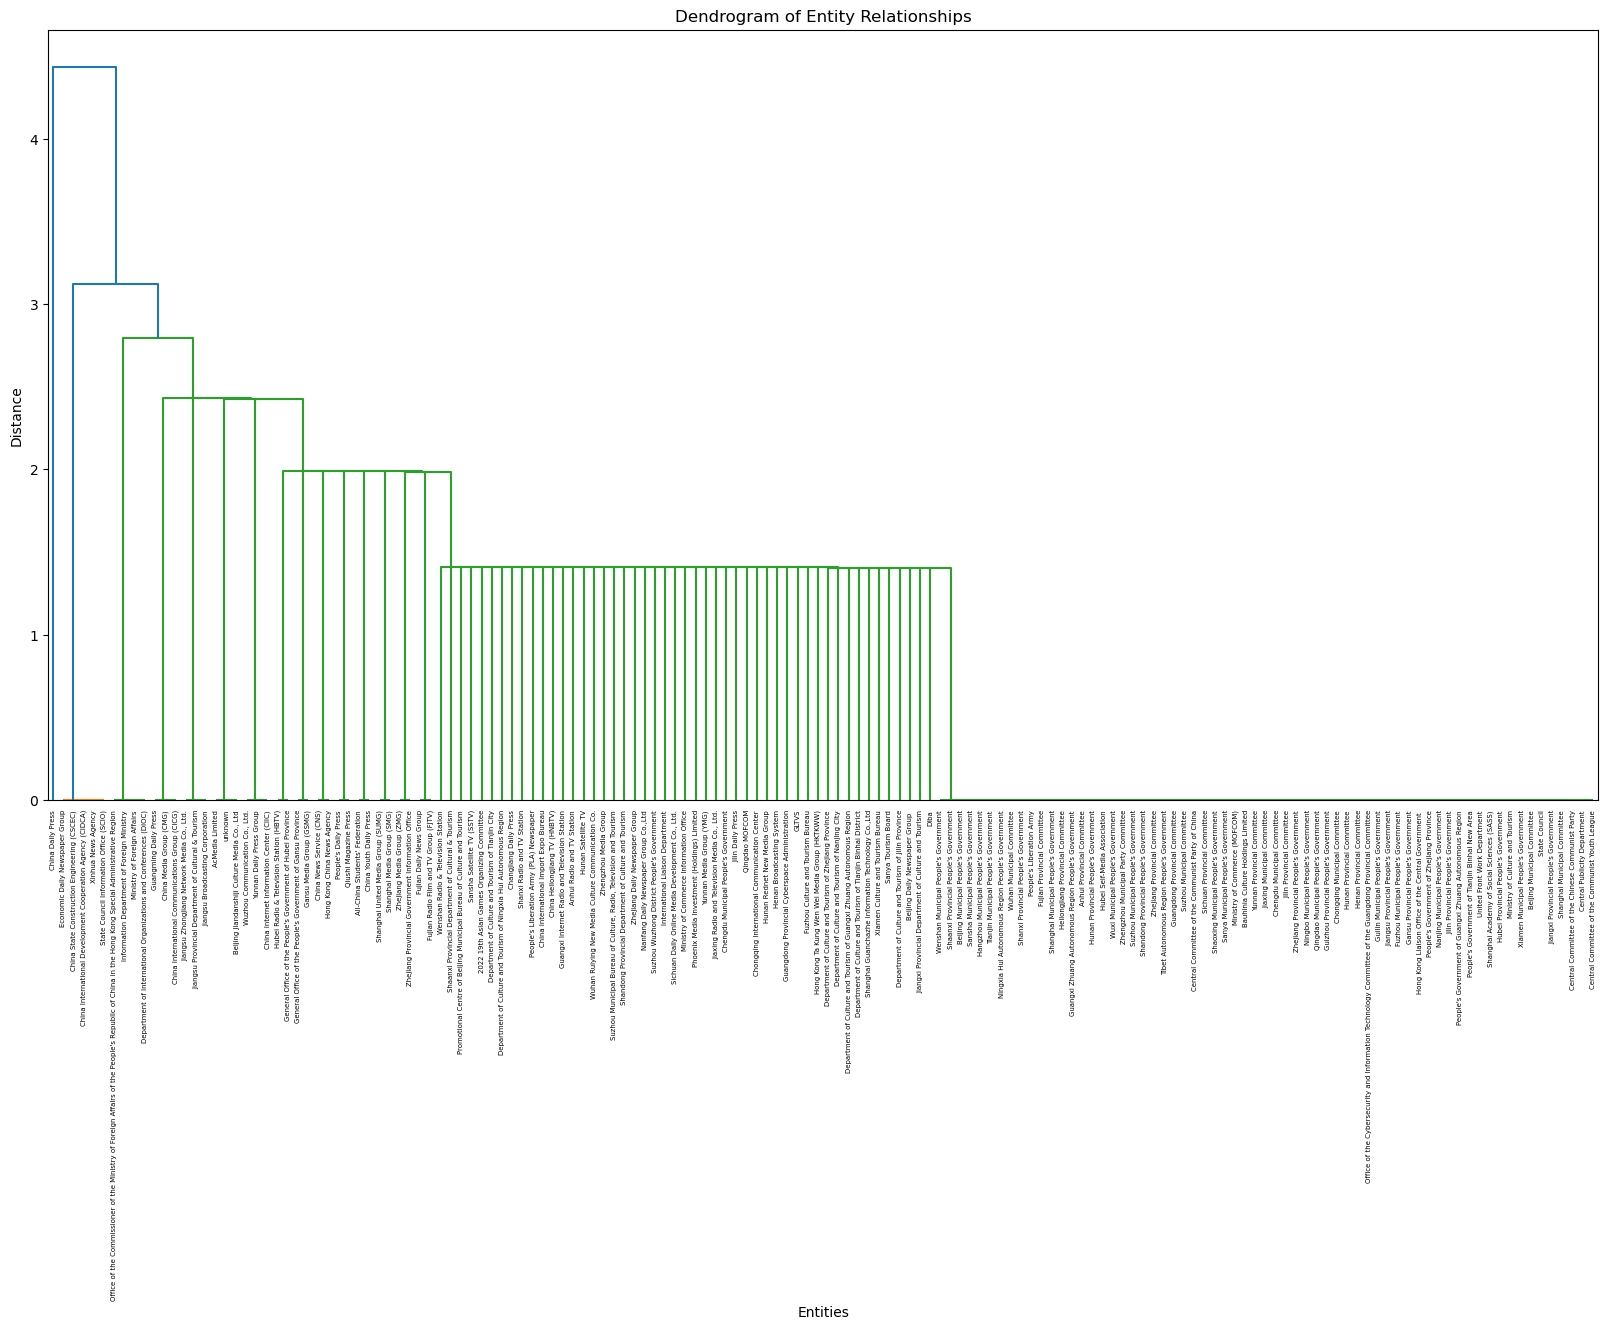

In [122]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'entity owner' and 'parent entity' columns
df = canis
# Step 1: Create a DataFrame with unique entities
unique_entities = pd.concat([df['Entity owner (English)'], df['Parent entity (English)']]).unique()
df_entities = pd.DataFrame(unique_entities, columns=['Entity owner (English)'])

# Step 2: Create a distance matrix based on the relationships between entities
matrix = pd.DataFrame(index=df_entities['Entity owner (English)'], columns=df_entities['Entity owner (English)'], data=0)

for _, row in df.iterrows():
    matrix.at[row['Entity owner (English)'], row['Parent entity (English)']] = 1

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(matrix, method='ward')

# Step 4: Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=matrix.index, orientation='top', leaf_rotation=90)
plt.title('Dendrogram of Entity Relationships')
plt.xlabel('Entities')
plt.ylabel('Distance')
plt.show()


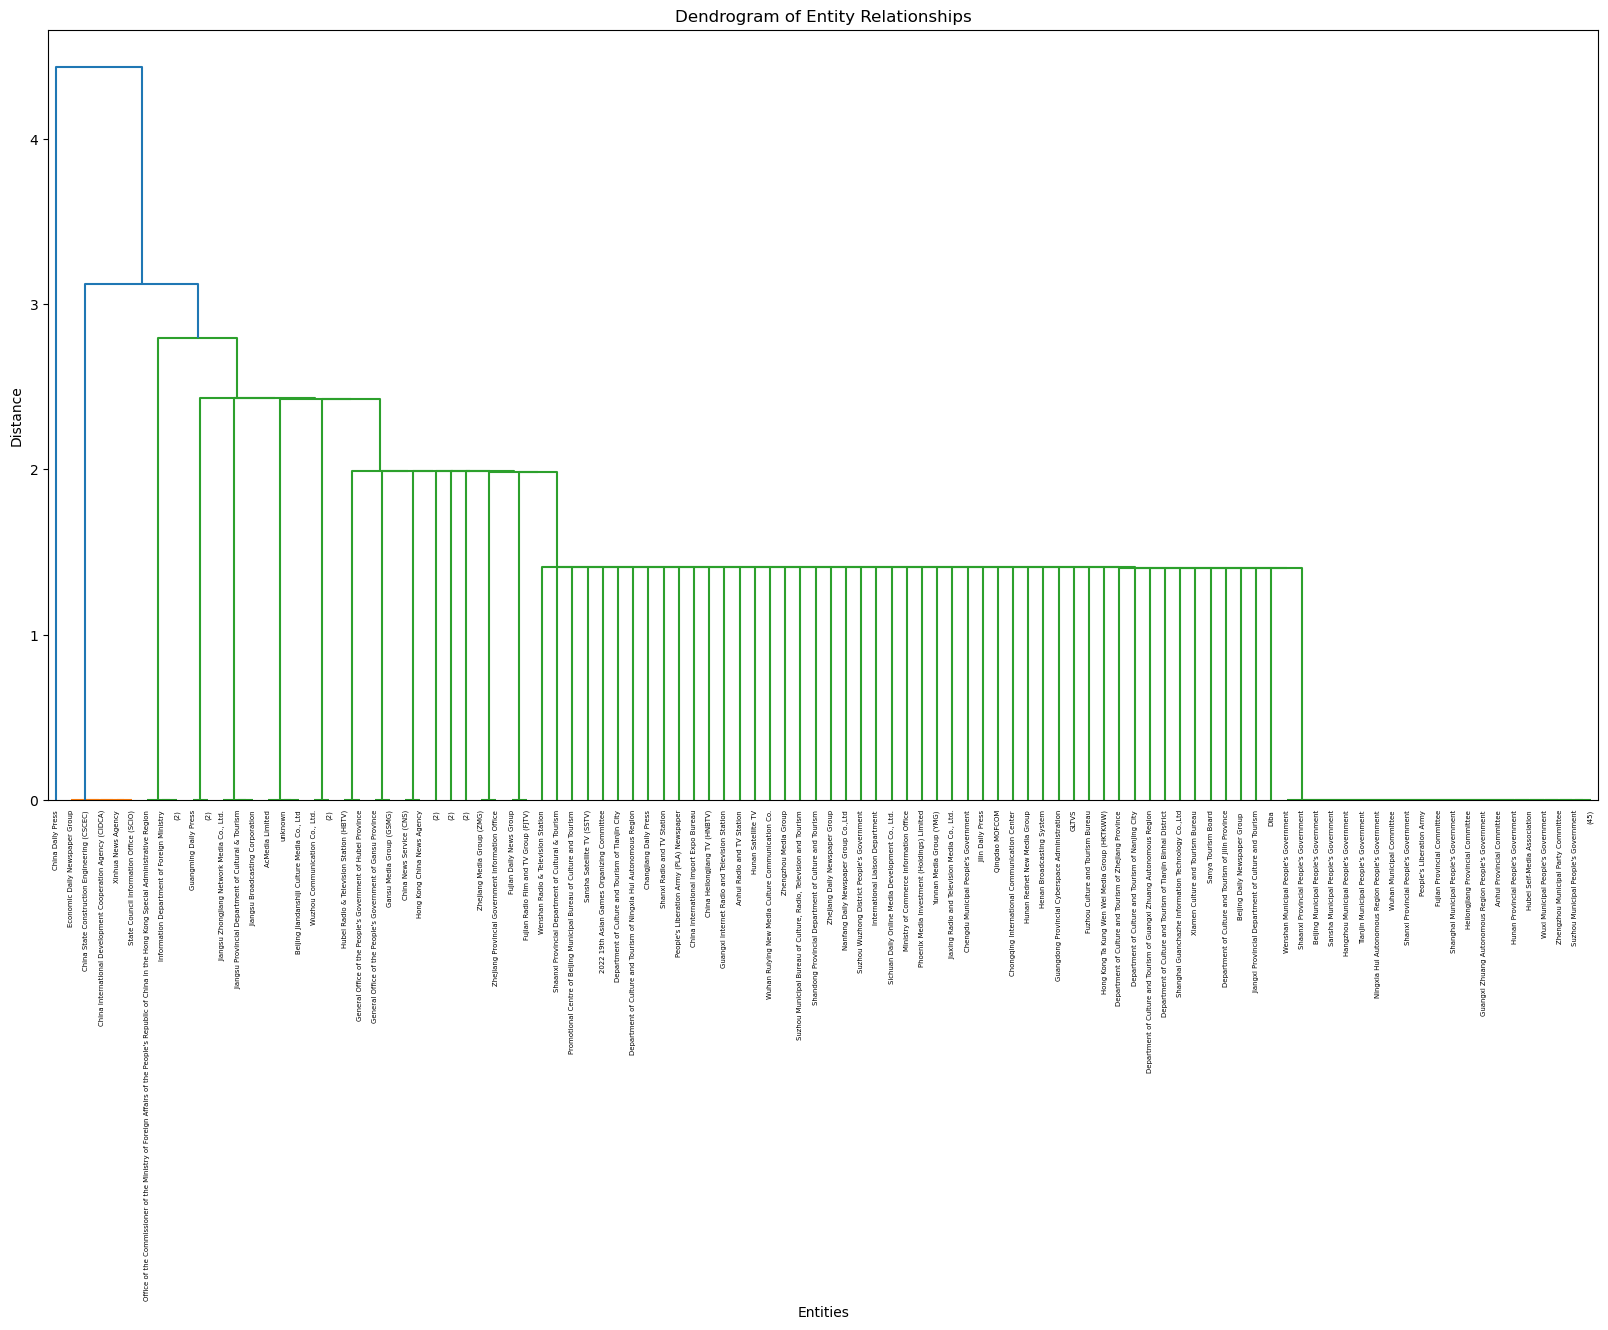

In [125]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'entity owner' and 'parent entity' columns

# Step 1: Create a DataFrame with unique entities
unique_entities = pd.concat([df['Entity owner (English)'], df['Parent entity (English)']]).unique()
df_entities = pd.DataFrame(unique_entities, columns=['Entity owner (English)'])

# Step 2: Create a distance matrix based on the relationships between entities
matrix = pd.DataFrame(index=df_entities['Entity owner (English)'], columns=df_entities['Entity owner (English)'], data=0)

for _, row in df.iterrows():
    matrix.at[row['Entity owner (English)'], row['Parent entity (English)']] = 1

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(matrix, method='ward')

# Step 4: Plot the dendrogram, excluding the last 20 entities
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=matrix.index, orientation='top', leaf_rotation=90, truncate_mode='lastp', p=matrix.shape[0]-50)
plt.title('Dendrogram of Entity Relationships')
plt.xlabel('Entities')
plt.ylabel('Distance')
plt.savefig('your_plot_filename.png')

plt.show()


In [126]:
plt.savefig('dendrogram.png')


<Figure size 640x480 with 0 Axes>

In [99]:
canis = pd.read_csv('canis_region_corrected.csv')

In [107]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the column for which you want to find unique values
unique_values = canis['Language'].unique()

# Print or use the unique values as needed
print(len(unique_values))

unique_values2 = canis['Region of Focus'].unique()

# Print or use the unique values as needed
print(len(unique_values2)) 

unique_values3 = canis['Parent entity (English)'].unique()

# Print or use the unique values as needed
print(len(unique_values3))


46
171
69


In [106]:
import numpy as np

# Assuming df is your DataFrame with 'entity' and 'parent entity' columns
df = canis
# Get unique values from both columns
unique_entities4 = np.unique(np.concatenate([df['Entity owner (English)'].unique(), df['Parent entity (English)'].unique()]))

# Print or use the unique values as needed
print(len(unique_entities4))


152
